Implementing circuit 3

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector as sv
import itertools

In [2]:
one_qbit_basis_states = [[1, 0], [0, 1]]
two_qbit_basis_states = list(itertools.product(one_qbit_basis_states, one_qbit_basis_states))
two_qbit_basis_states

[([1, 0], [1, 0]), ([1, 0], [0, 1]), ([0, 1], [1, 0]), ([0, 1], [0, 1])]

Circuit 1:

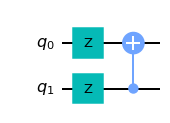

In [3]:
qc1 = QuantumCircuit(2)
qc1.z(0)
qc1.z(1)
qc1.cx(1, 0)
qc1.draw("mpl")

Circuit 2:

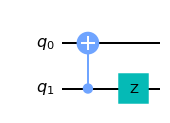

In [4]:
qc2 = QuantumCircuit(2)
qc2.cx(1, 0)
qc2.z(1)
qc2.draw("mpl")

In [5]:
for two_qbit_state in two_qbit_basis_states:
    qc1.initialize(two_qbit_state[0], 0)
    qc1.initialize(two_qbit_state[1], 1)
    qc2.initialize(two_qbit_state[0], 0)
    qc2.initialize(two_qbit_state[1], 1)
    qobj1 = assemble(qc1)
    qobj2 = assemble(qc2)
    svsim = Aer.get_backend('statevector_simulator')
    out_vector1 = svsim.run(qobj1).result().get_statevector()
    out_vector2 = svsim.run(qobj2).result().get_statevector()
    print(out_vector1, out_vector2, end = ' ')
    print(out_vector1 == out_vector2)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j] [1.+0.j 0.+0.j 0.+0.j 0.+0.j] [ True  True  True  True]
[0.+0.j 0.+0.j 1.+0.j 0.+0.j] [0.+0.j 0.+0.j 1.+0.j 0.+0.j] [ True  True  True  True]
[0.+0.j 1.+0.j 0.+0.j 0.+0.j] [0.+0.j 1.+0.j 0.+0.j 0.+0.j] [ True  True  True  True]
[0.+0.j 0.+0.j 0.+0.j 1.+0.j] [0.+0.j 0.+0.j 0.+0.j 1.+0.j] [ True  True  True  True]


All the output vectors are equal for each 2-bit basis state input